In [1]:
# This tutorial demonstrates lens data entry, first order analysis, and visualization for the python 
# package optiland

In [2]:
# set matplotlib to plot inline

%matplotlib inline

In [3]:
# The primary object used in optiland is the lens class, contained in the lens module, which defines all 
# surfaces, apertures, fields, wavelengths, etc. of our system.

import lens

In [4]:
# Create a lens instance. We will create a Cooke triplet with an F/# of 6.3. The only input parameter
# needed when instantiating a lens object is its name. We name it as follows.

cooke = lens.lens(name='Cooke Triplet: F/6.3')

In [5]:
# Next, we add all surfaces of our Cooke triplet. Every surface has an associated number, or index. The surfaces
# are zero-indexed. Additionally, a surface has a thickness attribute, which defines the axial distance
# between the surface itself and the following surface; this value defaults to 1e10, which is effectively
# infinity for our purposes. We also define the radii for all surfaces, the default value being 1e10.
# The material of each surface is also chosen. The default material is air, which has an index of 1.0 at
# all wavelengths. Note the stop attribute at surface 5. This defines this surface as our aperture stop.
# For a list of all surface attributes see the documentation for the surface module and class.

cooke.add_surface(number=0, thickness=1e10, comment='object')
cooke.add_surface(number=1, thickness=3.7, radius=24.11, material='N-SK4')
cooke.add_surface(number=2, thickness=4.66, radius=215.09)
cooke.add_surface(number=3, thickness=1.6, radius=-94.81, material='J-F8')
cooke.add_surface(number=4, thickness=2.37, radius=23.76)
cooke.add_surface(number=5, thickness=6.76, stop=True)
cooke.add_surface(number=6, thickness=3.5, radius=104.5, material='N-SK4')
cooke.add_surface(number=4, thickness=84.126, radius=-63.89)
cooke.add_surface(number=7, comment='image')

In [6]:
# We now add the aperture, which we said is F/6.3 for this triplet. We first select the aperture type, which
# must be one of "imageFNO", "EPD", "imageNA", "objectNA", or "object_cone_angle". The value of the aperture
# is specified as 6.3

cooke.aperture_type = 'imageFNO'
cooke.aperture_value = 6.3

In [7]:
# Fields are now added. We add three fields in the Y direction only: 0, 10, and 14 degrees. We choose a field
# type of "angle". For systems with objects not at infinity, we can also define the field type "object_height".

cooke.field_type = 'angle'
cooke.add_field(number=0, x=0, y=0)
cooke.add_field(number=1, x=0, y=10)
cooke.add_field(number=2, x=0, y=14)

In [8]:
# We now add wavelengths. This lens is designed for the visible spectrum, so we choose 3 wavelengths
# at the D, F, and C lines

cooke.add_wavelength(number=0, value=486.1)
cooke.add_wavelength(number=1, value=587.6, primary=True)
cooke.add_wavelength(number=2, value=656.3)

In [9]:
# optiland cannot currently perform vignetting analysis (yet!), so we set the semi-apertures of our lens
# such that there is no vignetting. This is done using the method set_SA()

cooke.set_SA()

In [10]:
# Now we want to see what our lens looks like. To do this we need the plot2D class from the visualize module.

from visualize import plot2D

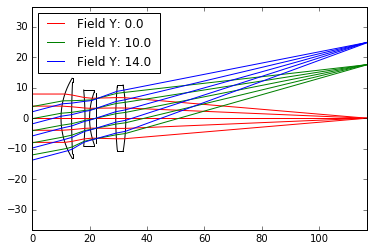

In [11]:
# The syntax for this method is as follows.

plot2D(cooke).show()

In [12]:
# Next, we perform some paraxial analyses on our system. Let's find the rear focal length of our system:

cooke.f2()

99.95189095689588

In [13]:
# We will calculate the remaining cardinal points. First, the front focal length, which should be identical to
# the rear focal length because the system is immersed in air.

cooke.f1()

99.951890956895866

In [14]:
# Front focal point

cooke.F1()

92.690057893561658

In [15]:
# Rear focal point

cooke.F2()

84.127208058688026

In [16]:
# Front principal point

cooke.P1()

7.2618330633342083

In [17]:
# Rear principal point

cooke.P2()

15.824682898207854

In [18]:
# Front nodal point

cooke.N1()

14.362774399915082

In [19]:
# Rear nodal point

cooke.N2()

8.0009754583114958

In [20]:
# We perform a few more paraxial calculations.

# Entrance Pupil Diameter (EPD) - expect this to be equal to f2/6.3 = 99.95/6.3, based on the definition of F/#
cooke.EPD()

15.865379516967604

In [21]:
# Optical Invariant

cooke.Inv()

-2.4048882811225125

In [22]:
# ABCD matrix elements. Note that this outputs a 2x2 numpy array

cooke.ABCD()

array([[  1.39609074e+00,   2.07009300e+01],
       [  1.55503727e-02,   9.46863365e-01]])

In [23]:
# Lastly, we will look at the seidel aberration sums, which are defined as spherical aberration, 
# coma, astigmatism, field curvature and distortion. This method also outputs a numpy array.

cooke.seidels()

array([-0.00887412, -0.0042408 ,  0.0058376 , -0.02272062, -0.00255739])